In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
df = pd.read_csv("weight-height (1) - weight-height (1).csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [4]:
df.isna().sum() 
df.duplicated().sum()


np.int64(0)

In [5]:
from pandas.api.types import is_numeric_dtype

In [6]:
mms = MinMaxScaler()
le = LabelEncoder()

In [7]:
for col in df.columns:
  if is_numeric_dtype(df[col]):
    df[col] =  mms.fit_transform(df[[col]])
  else:
    df[col] = le.fit_transform(df[col])

In [8]:
df.head()

,Gender,Height,Weight
0,1,0.744399,0.862415
1,1,0.548328,0.472703
2,1,0.754583,0.719657
3,1,0.662487,0.755412
4,1,0.590905,0.688360


In [9]:
y = df[['Gender']]
x = df.drop(['Gender'], axis=1)

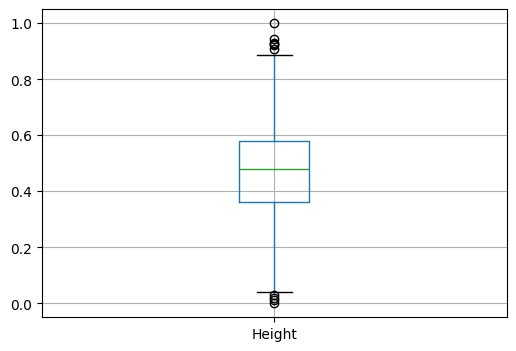

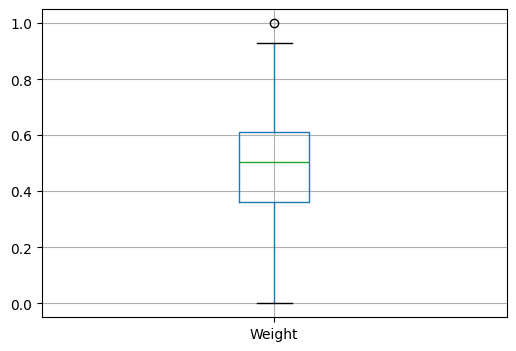

In [10]:
for col in x.columns:
  if is_numeric_dtype(x[col]):
    plt.figure(figsize=(6,4))
    x.boxplot(column=[col])

## Handeling Outliers

In [11]:
for col in x.columns:
  Q1 = x[col].quantile(.25)
  Q3 = x[col].quantile(.75)
  IQR = Q3 - Q1
  upper_limit = Q3 + 1.5 * IQR
  lower_limit = Q1 - 1.5 * IQR

  x[col] = np.where(
    x[col] < lower_limit,
    lower_limit,
    np.where(
      x[col] > upper_limit,
      upper_limit,
      x[col]
    )
  )

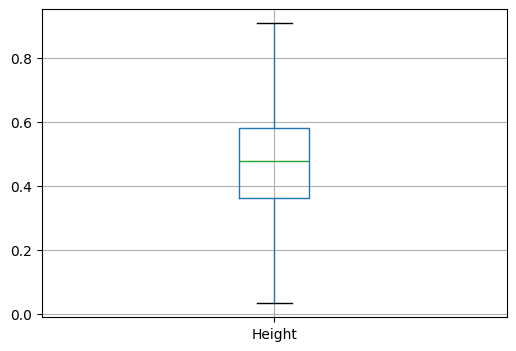

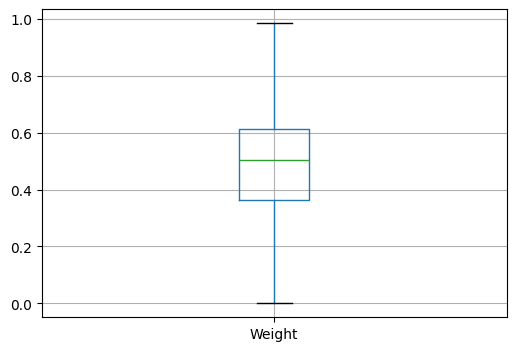

In [12]:
for col in x.columns:
  if is_numeric_dtype(x[col]):
    plt.figure(figsize=(6,4))
    x.boxplot(column=[col])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)

In [14]:
x_train.shape, y_train.shape
x_test.shape, y_test.shape

((1711, 2), (1711, 1))

## Apply model

In [15]:
lr = LinearRegression()
knn = KNeighborsClassifier()

### Use Linear Regression

In [16]:
lr_model = lr.fit(x_train, y_train)

In [17]:
y_pred = lr_model.predict(x_test)

In [18]:
lr_score = r2_score(y_pred,y_test)
lr_score

0.4794441927034597

### Use KNeighborsClassifier

In [19]:
Knn_model = knn.fit(x_train, y_train)

c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [20]:
y_pred = Knn_model.predict(x_test)

In [21]:
knn_score = accuracy_score(y_pred, y_test)
knn_score

0.9246054938632379

### Comparison Linear and KNN

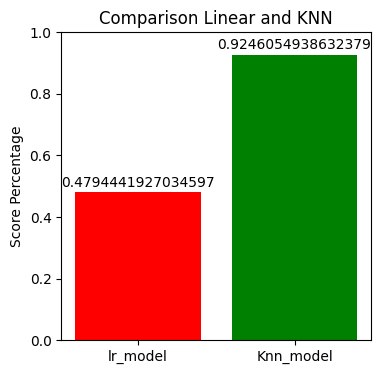

In [22]:
scores = [lr_score, knn_score]
plt.figure(figsize=(4,4))
plt.bar(["lr_model", "Knn_model"],[lr_score, knn_score], color = ['red', 'green'])
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, str(v), ha='center')
plt.ylabel("Score Percentage")
plt.title("Comparison Linear and KNN")
plt.ylim(0, 1)   # R² score range
plt.show()

### logistic model

In [23]:
los = LogisticRegression()

In [24]:
los_model = los.fit(x_train, y_train)

c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
y_pred = los_model.predict(x_test)

In [26]:
los_score = r2_score(y_pred, y_test)

In [27]:
los_score

0.6605972645591442

### Comparison Logistic and KNN

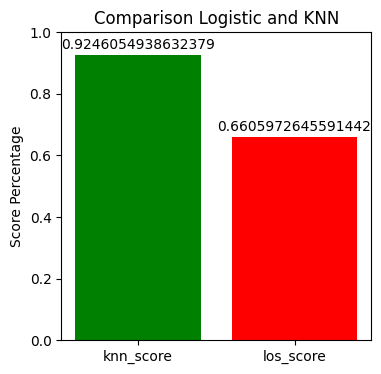

In [28]:
scores = [knn_score, los_score]
plt.figure(figsize=(4,4))
plt.bar(['knn_score', 'los_score'], scores, color = ['green', 'red'])

for i, v in enumerate(scores):
  plt.text(i, v + 0.02, str(v), ha = 'center')
plt.title("Comparison Logistic and KNN")
plt.ylabel("Score Percentage")
plt.ylim(0,1)
plt.show()

### plot 3 score bar

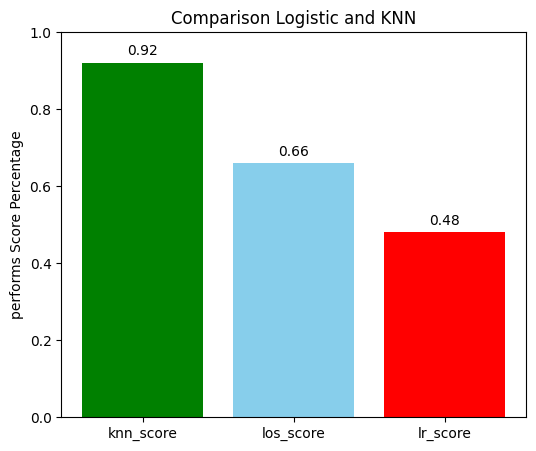

In [29]:
scores = [knn_score, los_score, lr_score]
scores = [round(knn_score,2),round(los_score, 2), round(lr_score, 2) ]
plt.figure(figsize=(6,5))
plt.bar(['knn_score', 'los_score', 'lr_score'], scores, color = ['green', 'skyblue', 'red'])
for i, v in enumerate(scores):
  plt.text(i, v + 0.02 , str(v), ha = 'center')

plt.title("Comparison Logistic and KNN")
plt.ylabel("performs Score Percentage")
plt.ylim(0,1)
plt.show()

In [30]:
x = 12.34567
print(f"{x:.2f}")


12.35
